In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cv2
from sklearn.neighbors import NearestNeighbors

In [3]:
folder_path = "Data\Testing Data set"
images = []
for filename in os.listdir(folder_path):
    if filename.endswith('.webp') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        image = image.reshape(-1)
        images.append(image)

In [4]:
images[3].shape

(172200,)

In [45]:
cv2.imread("Data\Testing Data set\slide1.webp").shape

(205, 280, 3)

In [ ]:
plt.imshow(cv2.imread("Data\Testing Data set\slide1.webp"))

In [5]:
cost = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(images)
    cost.append(kmeans.inertia_)

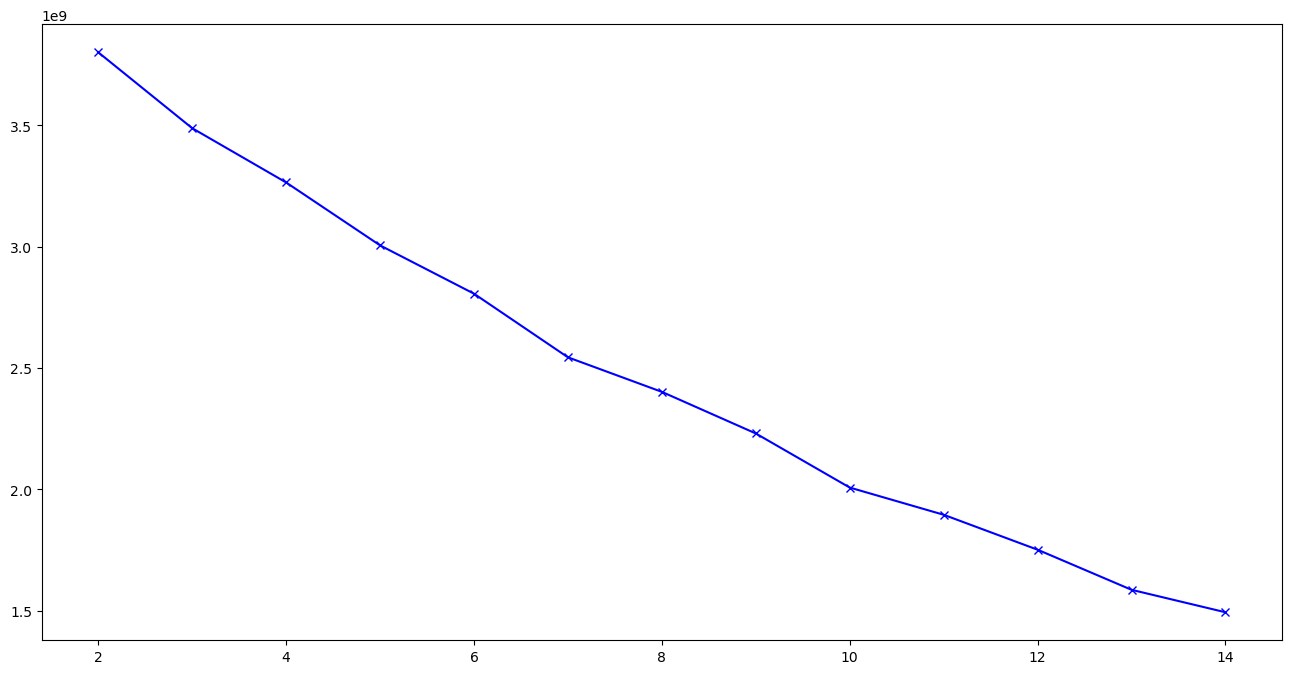

In [6]:
plt.figure(figsize=(16,8))
plt.plot(range(2,15), cost, 'bx-')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(images)

KMeans(n_clusters=3)

In [12]:
print(kmeans.labels_)
index_cluster_0 = np.where(kmeans.labels_ == 0)
print(index_cluster_0[0])

[2 1 2 1 1 0 1 1 2 1 1 1 1 1 2 0 0 2 1 2 2 1 1 1 2 2 0 1]
[ 5 15 16 26]


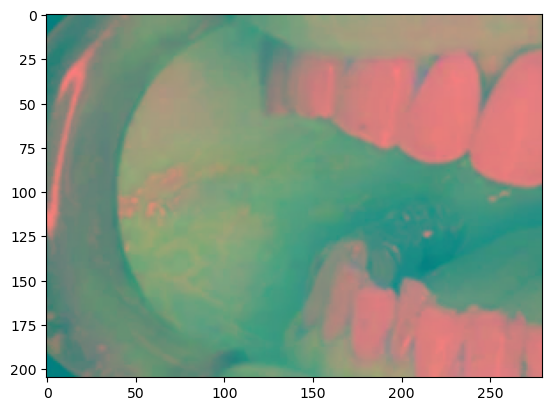

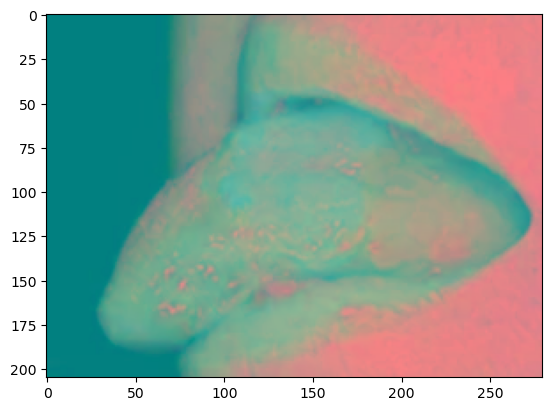

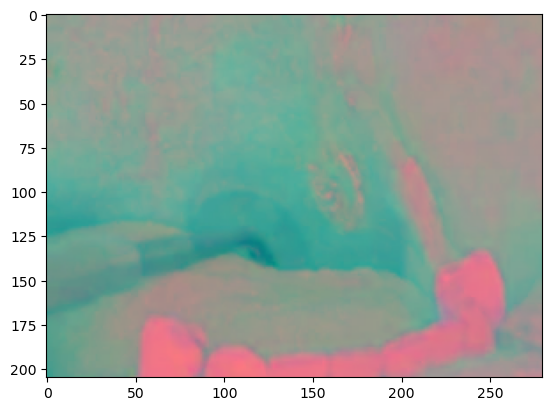

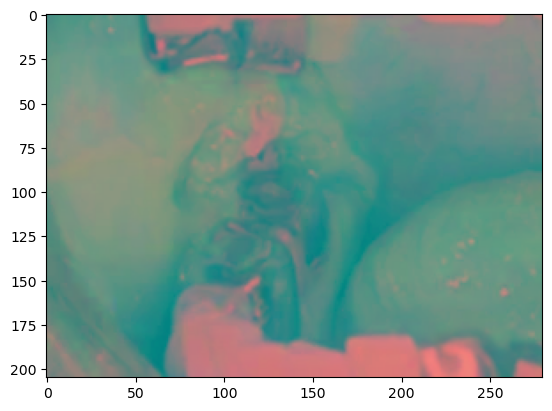

In [9]:
for i in index_cluster_0[0]:
    plt.imshow(images[i].reshape((205, 280, 3)))
    plt.show()

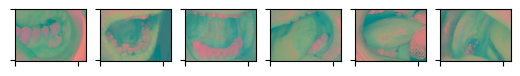

In [28]:
index_cluster_i = np.where(kmeans.labels_ == 1)
index_cluster_i[0]
fig, axs = plt.subplots(1, min(len(index_cluster_i[0]), 6))
for i, label in enumerate(index_cluster_i[0]):
    if i >= 6: break
    axs[i].imshow(images[label].reshape((205, 280, 3)))
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
plt.show()

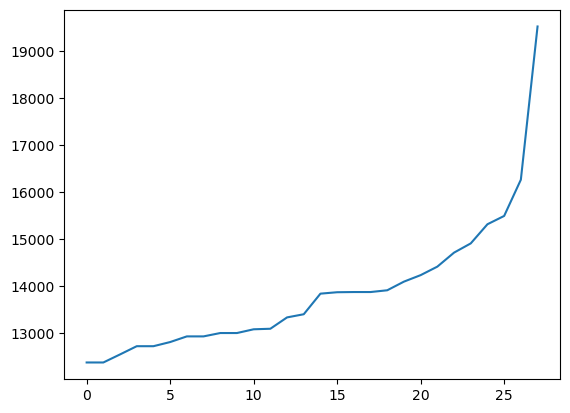

In [121]:
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(images)
distances, indices = nbrs.kneighbors(images)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [117]:
dbscan = DBSCAN(eps=15314.56052259, min_samples=7)
dbscan.fit(images)
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

(array([ 5,  8, 11, 15, 19], dtype=int64),)


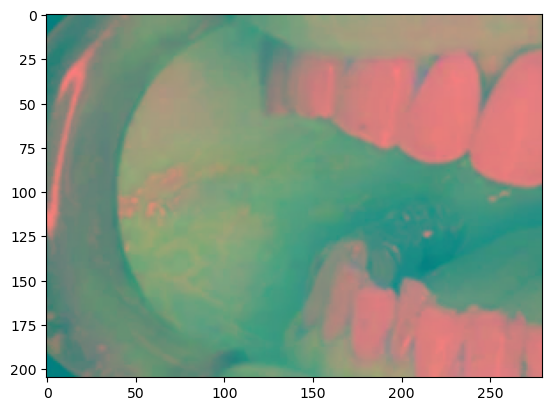

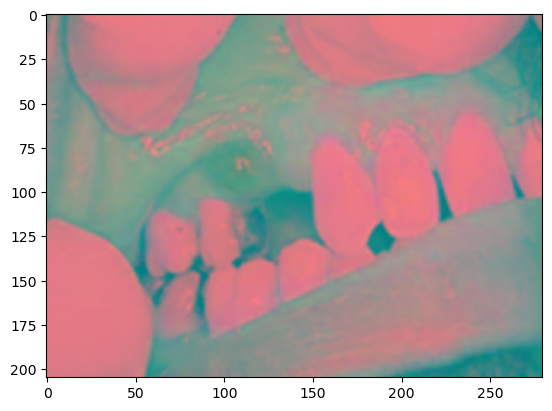

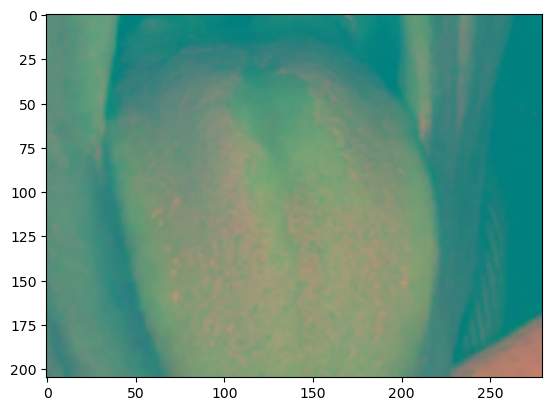

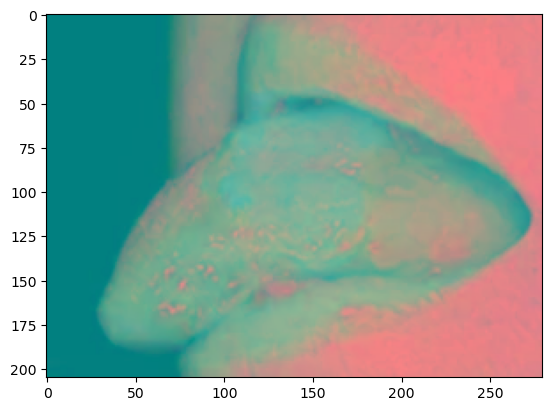

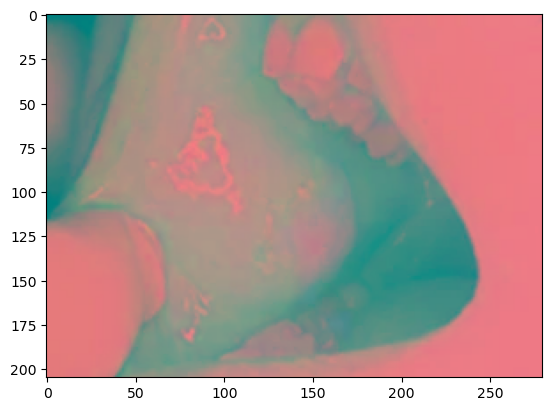

In [120]:
index_cluster_1 = np.where(dbscan.labels_ == -1)
print(index_cluster_1)
index_cluster_1[0]
for i in index_cluster_1[0]:
    plt.imshow(images[i].reshape((205, 280, 3)))
    plt.show()

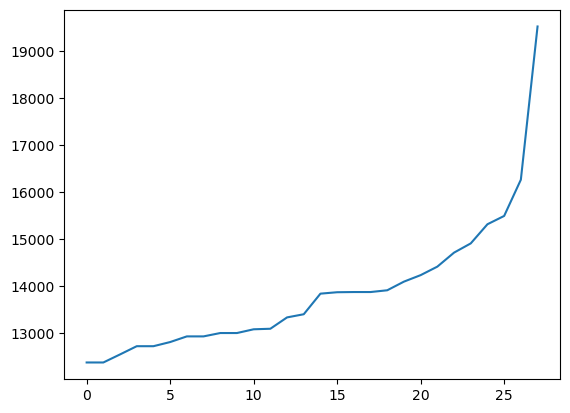